In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [4]:
df = pd.read_csv("C:/Users/문도/Desktop/인지개 자료/boston.csv", index_col = 0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


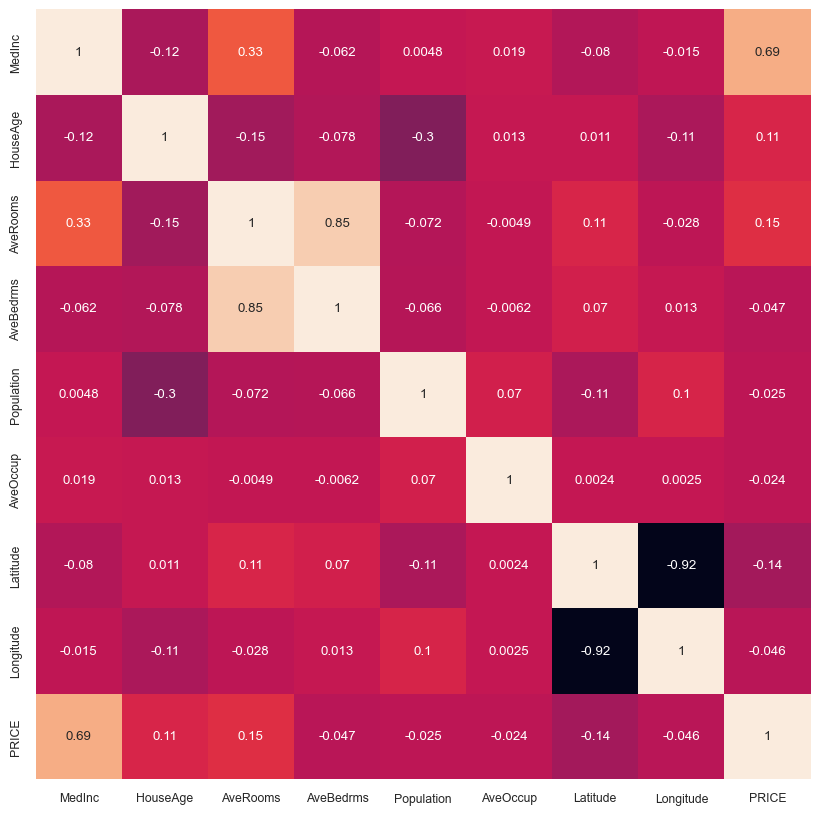

In [5]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
X = df.drop('PRICE', axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y = df['PRICE']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [8]:
Y = pd.get_dummies(y).values

In [10]:
X = X.values

In [11]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [12]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [17]:
model = Sequential()

model.add(Dense(8, input_shape = (8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,761 (10.79 KB)

 Trainable params: 2,761 (10.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
EPOCHS = 30
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = 32, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5606 - mse: 0.5606 - val_loss: 0.6057 - val_mse: 0.6057
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5420 - mse: 0.5420 - val_loss: 0.7217 - val_mse: 0.7217
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5212 - mse: 0.5212 - val_loss: 0.6931 - val_mse: 0.6931
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5537 - mse: 0.5537 - val_loss: 0.5098 - val_mse: 0.5098
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5482 - mse: 0.5482 - val_loss: 0.5645 - val_mse: 0.5645
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5483 - mse: 0.5483 - val_loss: 0.5822 - val_mse: 0.5822
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.5445 - val_mse: 0.5445
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5417 - mse: 0.5417 - val_loss: 0.5431 - val_mse: 0.5431
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

## optimizer = 'rmsprop'

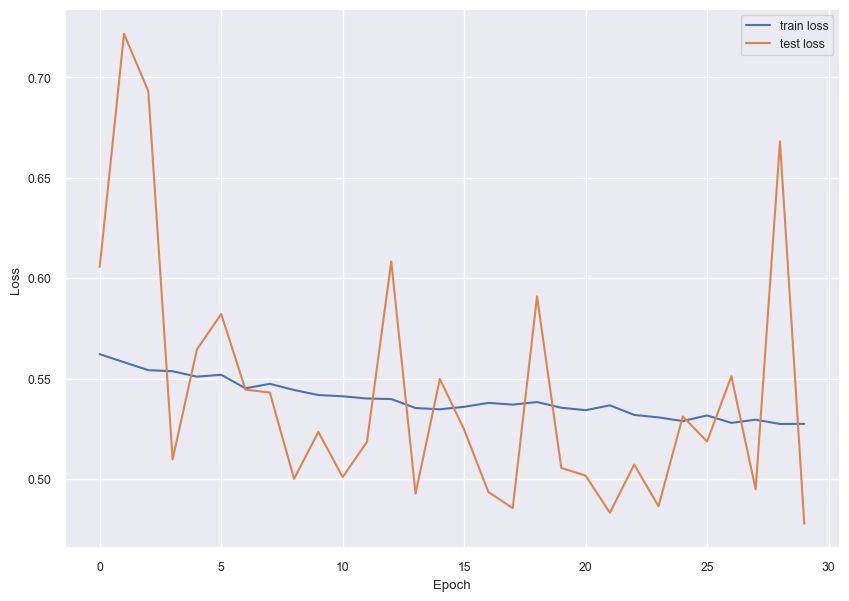

In [22]:
plt.figure(figsize=(10,7))
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model = Sequential()

model.add(Dense(8, input_shape = (8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

F:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,761 (10.79 KB)

 Trainable params: 2,761 (10.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
EPOCHS = 50
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = 16, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2691 - mse: 1.2691 - val_loss: 0.6248 - val_mse: 0.6248
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8283 - mse: 0.8283 - val_loss: 0.5927 - val_mse: 0.5927
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7054 - mse: 0.7054 - val_loss: 0.6621 - val_mse: 0.6621
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6646 - mse: 0.6646 - val_loss: 0.8535 - val_mse: 0.8535
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6252 - mse: 0.6252 - val_loss: 0.5961 - val_mse: 0.5961
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6240 - mse: 0.6240 - val_loss: 0.5666 - val_mse: 0.5666
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6154 - mse: 0.6154 - val_loss: 0.5810 - val_mse: 0.5810
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6302 - mse: 0.6302 - val_loss: 0.5659 - val_mse: 0.5659
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━

## optimizer = 'adam'

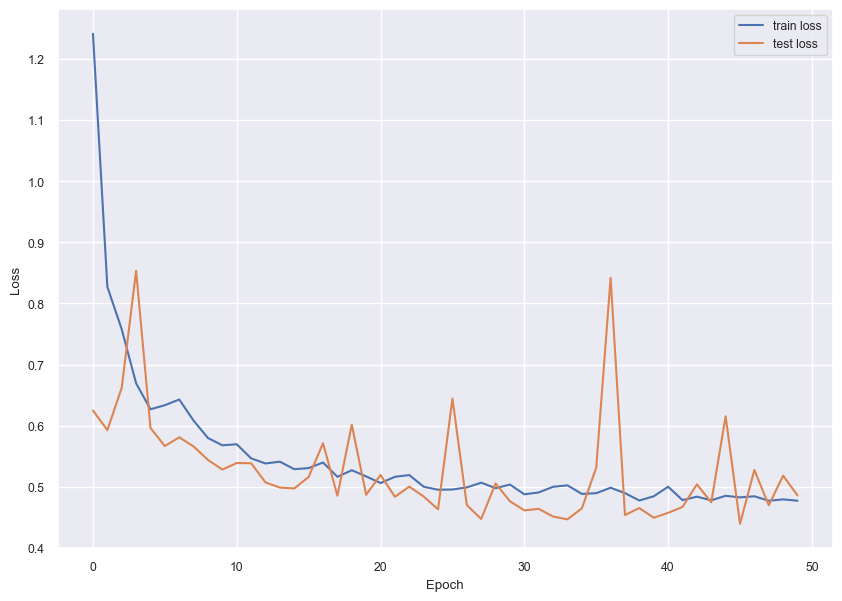

In [26]:
plt.figure(figsize=(10,7))
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4710 - mse: 0.4710  


[0.4858538508415222, 0.4858538508415222]